<a href="https://colab.research.google.com/github/huynhminhtuan3006-sketch/VGG16/blob/main/VGG16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import torch
import torchvision.models as models

model = models.vgg16(pretrained=False)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [8]:
model.classifier[6] = torch.nn.Linear(4096, 8)


In [9]:
state_dict = torch.load(
    "/content/drive/MyDrive/vgg16_vehicle_coco.pth",
    map_location=torch.device('cpu')  # hoặc 'cuda'
)

model.load_state_dict(state_dict)


<All keys matched successfully>

In [10]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
from PIL import Image
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

In [12]:
class_names = ['airplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 'truck']


In [13]:
import requests
from io import BytesIO
from PIL import Image

url = "https://www.shutterstock.com/image-illustration/3d-black-super-sports-motorbike-260nw-1949613151.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

Prediction: motorbike


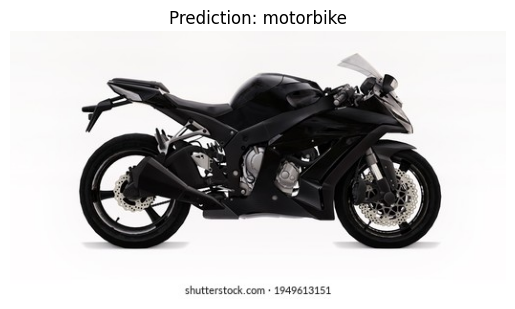

In [14]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Define device for tensor operations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_tensor = transform(img).unsqueeze(0).to(device)

# -------- PREDICT --------
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_idx = torch.max(output, 1)
    # Note: 'train_data' and its 'classes' attribute are not defined in the current state.
    # This line would cause a NameError. Using predicted_idx for now.
    # Please define 'train_data' (e.g., your dataset) with its 'classes' attribute
    # or replace this with your actual class labels.
    predicted_class = class_names[predicted_idx.item()]

print(f"Prediction: {predicted_class}") # Corrected print statement

# -------- SHOW RESULT --------
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}") # Corrected incomplete statement
plt.axis("off")
plt.show()